In [2]:
import numpy as np

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import Aer

from scipy.optimize import minimize
from scipy.optimize import basinhopping
from scipy.optimize import differential_evolution

from MSA_class import MultipleSequenceAlignment
from Qiskit_class import QiskitSimulation


import matplotlib.pyplot as plt

plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")



## Testcase 1)

In [3]:
my_strings   = np.array(["AG","G"])
my_penalties = np.array([1,1,1])*2
my_msa       = MultipleSequenceAlignment(strings = my_strings, penalties = my_penalties, normalize_weights=True) 

valid_perms     = my_msa.get_valid_perms()
valid_solutions = [my_msa.matrix_2_bit_state(perm,my_msa.initial_MSA) for perm in valid_perms]

print("Valid solutions:")
for solution in valid_solutions:
    print(solution)


Valid solutions:
[1. 0. 0. 1. 1. 0.]
[1. 0. 0. 1. 0. 1.]


In [4]:
p = 1000
theta_0 = np.ones(p)

my_simulation = QiskitSimulation(initial_MSA=my_msa, theta_0=theta_0, backend_name="qasm_simulator", shots=10000)



bounds = [(0,4 * np.pi), (0,4 * np.pi)]
res = differential_evolution(func=my_simulation.execute_circuit, bounds=bounds,popsize=10)
print("Total number of different states found in simulation:",len(list(my_simulation.current_counts.values())))
print(res)


Total number of different states found in simulation: 63
     fun: 0.191525
 message: 'Optimization terminated successfully.'
    nfev: 623
     nit: 30
 success: True
       x: array([9.01074381, 6.67732905])


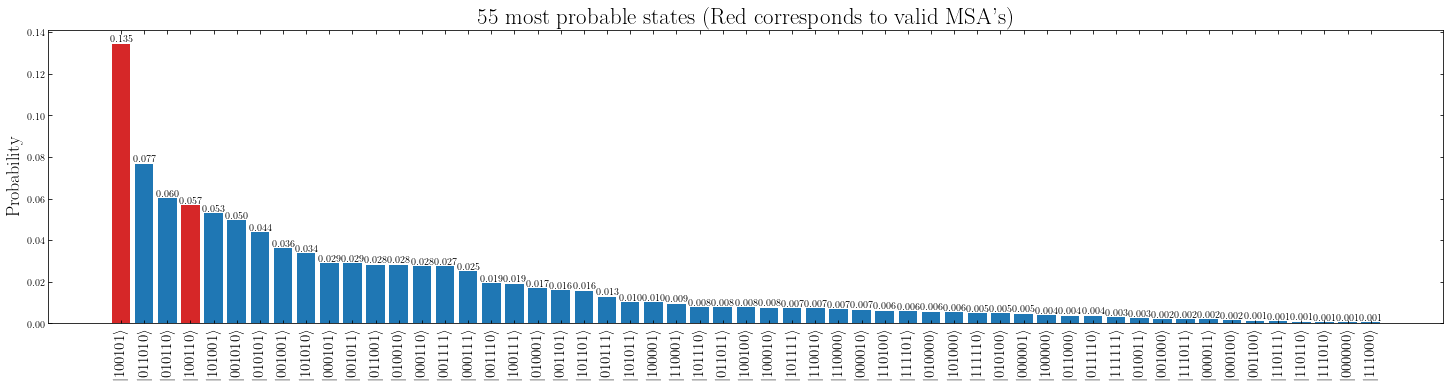

In [5]:
my_simulation.plot_count_histogram(counts = my_simulation.inverse_dict_states(my_simulation.current_counts), solutions = valid_solutions)

In [6]:
idx = 0
my_simulation.print_solution(idx)

#####################################################
#### Most probale state according to simulation ####
----------------------|100101|----------------------
####################################################
with corresponding MSA:
[['A' 'G']
 ['_' 'G']]
####################################################


## Testcase 2)

In [11]:
my_strings   = np.array(["AG","G","A"])
my_penalties = np.array([1,1,1])*2
my_msa       = MultipleSequenceAlignment(strings = my_strings, penalties = my_penalties, normalize_weights=True) 

print("Initial matrix:\n",my_msa.initial_MSA)

valid_perms     = my_msa.get_valid_perms()
valid_solutions = [my_msa.matrix_2_bit_state(perm,my_msa.initial_MSA) for perm in valid_perms]

print("Valid solutions:")
for solution in valid_solutions:
    print(solution)


Initial matrix:
 [['A' 'G']
 ['A' '_']
 ['G' '_']]
Valid solutions:
[1. 0. 0. 1. 0. 1. 1. 0.]
[1. 0. 0. 1. 0. 1. 0. 1.]
[1. 0. 0. 1. 1. 0. 1. 0.]
[1. 0. 0. 1. 1. 0. 0. 1.]


In [12]:
p = 1000
theta_0 = np.ones(p)

my_simulation = QiskitSimulation(initial_MSA=my_msa, theta_0=theta_0, backend_name="qasm_simulator", shots=10000)

bounds = [(0,4 * np.pi), (0,4 * np.pi)]
res = differential_evolution(func=my_simulation.execute_circuit, bounds=bounds,popsize=10)

print("Total number of different states found in simulation:",len(list(my_simulation.current_counts.values())))
print(res)

Total number of different states found in simulation: 234
     fun: -0.652625
 message: 'Optimization terminated successfully.'
    nfev: 383
     nit: 18
 success: True
       x: array([6.68931265, 5.9096593 ])


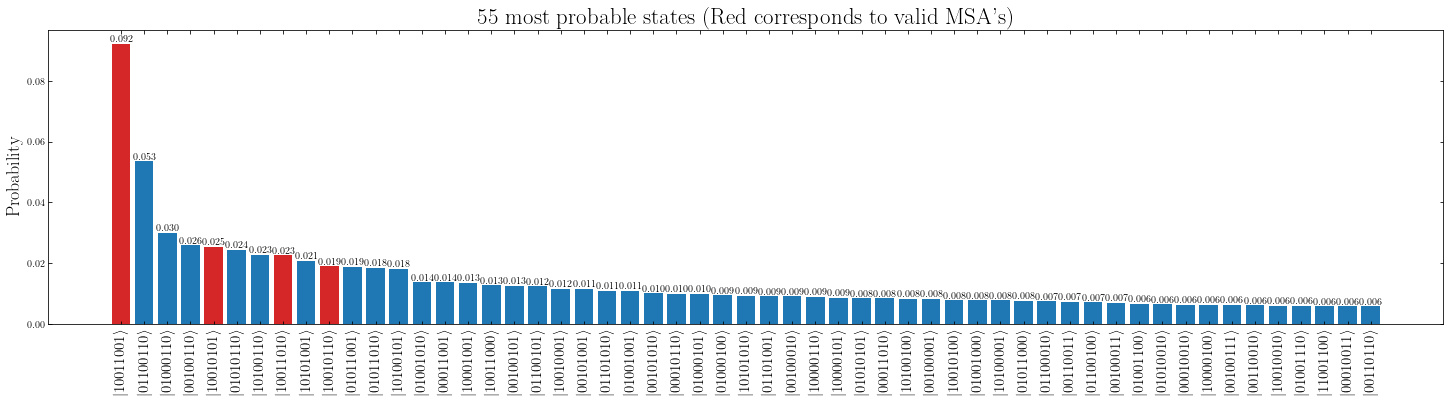

In [13]:
my_simulation.plot_count_histogram(counts = my_simulation.inverse_dict_states(my_simulation.current_counts), solutions = valid_solutions)

In [14]:
idx = 0
my_simulation.print_solution(idx)

#####################################################
#### Most probale state according to simulation ####
---------------------|10011001|---------------------
####################################################
with corresponding MSA:
[['A' 'G']
 ['A' '_']
 ['_' 'G']]
####################################################
